In [2]:
import numpy as np
import quantecon as qe

np.set_printoptions(precision=3, suppress=True)


![http://jakevdp.github.io/images/ChutesAndLadders-board.gif](http://jakevdp.github.io/images/ChutesAndLadders-board.gif)

In [3]:
# Mapping of start : end spaces of chutes & ladders
chutes_ladders = {
    1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44,
    47:26, 49:11, 51:67, 56:53, 62:19, 64:60,
    71:91, 80:100, 87:24, 93:73, 95:75, 98:78
}

In [19]:
def make_P(N, chutes_ladders):
    # WANT: create a transition matrix P for a game of chutes and ladders
    # conditions:
    #   - all elements are >= 0
    #   - each row sums to 1
    #   - row `i` represents the probability of beginning your turn on square i and ending on any other square.
    P = np.zeros((N+1, N+1))
    
    # start with basic case, ignoring all chutes and ladders
    for i in range(1, N+1):
        P[i-1, i:(i+6)] = 1/6
    
    # once you are here, you win!
    P[N, N] = 1
    
    # House rules: you don't need to land on 100, just reach it.
    P[95:100,100] += np.linspace(1/6, 5/6, 5)

    for (i1, i2) in chutes_ladders.items():
        # iw keeps track of when we would have landed on i1
        iw = np.where(P[:,i1] > 0)
        P[:, i1] = 0  # can't land here...
        P[iw, i2] += 1/6  # move to i2 instead
        
    return P


In [20]:
P = make_P(100, chutes_ladders)

In [22]:
mc = qe.MarkovChain(P)

Questions

- Stationary Distribution
- Distribution after N rounds
- Expected number of rounds
- Percent of games finished in N rounds

In [23]:
mc.stationary_distributions  # the game always ends!

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.]])

In [28]:
simulations = mc.simulate(200, init=0, num_reps=5000)

In [29]:
simulations.shape

(5000, 200)

In [33]:
simulations

array([[  0,   5,  10, ..., 100, 100, 100],
       [  0,   3,  14, ..., 100, 100, 100],
       [  0,   5,  10, ..., 100, 100, 100],
       ...,
       [  0,   5,  11, ..., 100, 100, 100],
       [  0,   2,   5, ..., 100, 100, 100],
       [  0,  38,  43, ..., 100, 100, 100]])

In [25]:
s0 = np.zeros(101)
s0[0] = 1

In [38]:
# distribution after 1 round
s1 = s0@P
s1

array([0.   , 0.   , 0.167, 0.167, 0.   , 0.167, 0.167, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.167, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.167, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [54]:
# distribution after 2 rounds
s2 = s1 @ P  # == s0 @ P @ P
s2

array([0.   , 0.   , 0.   , 0.028, 0.   , 0.056, 0.111, 0.111, 0.111,
       0.   , 0.056, 0.056, 0.028, 0.   , 0.056, 0.028, 0.   , 0.028,
       0.028, 0.028, 0.028, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.028, 0.028, 0.028, 0.028, 0.028, 0.028,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [45]:
# distribution after 100 rounds
s0 @ np.linalg.matrix_power(P, 100)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.978])

In [51]:
pct_finished_at_round = (simulations == 100).mean(axis=0)

Text(0, 0.5, 'cumulative percent of games finishsed')

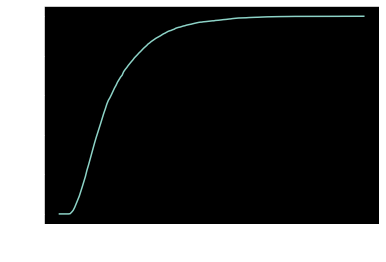

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(pct_finished_at_round)
ax.set_xlabel("round number")
ax.set_ylabel("cumulative percent of games finishsed")